In [39]:
import cv2 as cv
import math
from matplotlib import pyplot as plt
import numpy as np

In [40]:
def refresh(labColor, debug=False):
    [lightness, a, b] = labColor
    if debug:
        print(labColor)

    lightness = max(
        0,
        min(
            255,
            math.floor(
                (0.834 * (lightness / 100) ** 2 + 0.309 * (lightness / 100) + 0.145)
            ),
        ),
    )

    a = max(0, min(255, math.floor((1.077 * ((a + 128) / 255) - 0.039))))
    b = max(0, min(255, math.floor((1.09 * ((b + 128) / 255) - 0.054))))
    
    ret = np.array([lightness, a, b], dtype=np.uint8)
    if debug:
        print(ret)
    return ret



In [41]:
img = cv.imread('../src/assets/la-grande-jatte.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2Lab)

In [42]:
for row in img:
    for (idx, pixel) in enumerate(row):
        should_debug = idx > 1024 and idx < 1280
        pixel_refreshed = refresh(pixel, should_debug)
        if should_debug:
            print(pixel, pixel_refreshed)
        row[idx] = pixel_refreshed

[  3 130 130] [0 1 1]
[  2 132 130] [0 1 1]
[  1 132 128] [0 1 1]
[  1 130 123] [0 1 1]
[  5 128 123] [0 1 1]
[  5 124 130] [0 1 1]
[  9 120 133] [0 1 1]
[  5 124 130] [0 1 1]
[  7 128 131] [0 1 1]
[  2 132 128] [0 1 1]
[  5 136 128] [0 1 1]
[  5 136 130] [0 1 1]
[  2 134 130] [0 1 1]
[  1 128 127] [0 1 1]
[  5 128 125] [0 1 1]
[  3 139 104] [0 1 0]
[  2 132 115] [0 1 0]
[  1 128 124] [0 1 1]
[  9 122 130] [0 1 1]
[  7 124 128] [0 1 1]
[  7 126 122] [0 1 1]
[  6 134 109] [0 1 0]
[  5 136 120] [0 1 1]
[  6 139 129] [0 1 1]
[  2 134 130] [0 1 1]
[  3 126 130] [0 1 1]
[  6 124 131] [0 1 1]
[  5 124 130] [0 1 1]
[  1 126 129] [0 1 1]
[  3 130 129] [0 1 1]
[  2 130 130] [0 1 1]
[  1 128 129] [0 1 1]
[  1 128 129] [0 1 1]
[  7 128 130] [0 1 1]
[  1 132 123] [0 1 1]
[  3 134 117] [0 1 0]
[  2 134 114] [0 1 0]
[  3 130 120] [0 1 1]
[  3 126 130] [0 1 1]
[  2 126 130] [0 1 1]
[  0 130 128] [0 1 1]
[  1 132 125] [0 1 1]
[  2 134 112] [0 1 0]
[  6 136 108] [0 1 0]
[  3 130 119] [0 1 1]
[  1 130 1

KeyboardInterrupt: 

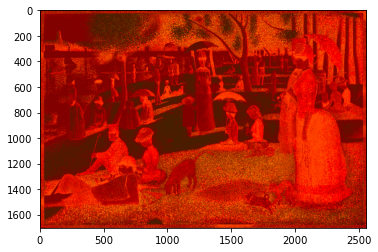

True

In [ ]:
img = cv.cvtColor(img, cv.COLOR_Lab2RGB)
plt.imshow(img)
plt.show()
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
cv.imwrite('../src/assets/la-grande-jatte-refreshed-py.jpg', img)